In [7]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import math
from skimage import metrics

[[ 64  78  91 ...  81  81  96]
 [ 93  91  84 ...  84  91  81]
 [ 71  62  79 ...  88  92 105]
 ...
 [ 30  32  29 ...  26  65  86]
 [ 36  32  36 ...  12  49  49]
 [ 27  44  45 ...  16   0  25]]


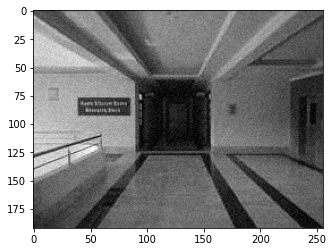

In [8]:
img= cv2.imread('noisy_image.jpg',0)
org = cv2.imread('original.jpg',0)
# img=cv2.resize(img,(512,512))
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(img,'gray')
print(img)

In [9]:
padded_arr =cv2.copyMakeBorder(img,1,1,1,1,cv2.BORDER_CONSTANT,value=0)
new_img=np.zeros(img.shape)

for i in range (1,img.shape[1]):
    padded_arr[0][i]=padded_arr[1][i]
    padded_arr[img.shape[0]+1][i]=padded_arr[img.shape[0]][i]
for i in range (1,img.shape[0]):
    padded_arr[i][0]=padded_arr[i][1]
    padded_arr[i][img.shape[1]+1]=padded_arr[i][img.shape[1]]
padded_arr[0][0]=padded_arr[1][1]
padded_arr[img.shape[0]+1][0]=padded_arr[img.shape[0]][1]
padded_arr[img.shape[0]+1][img.shape[1]+1]=padded_arr[img.shape[0]][img.shape[1]]
padded_arr[0][img.shape[1]+1]=padded_arr[1][img.shape[1]]

In [10]:
for i in range (img.shape[0]):
    for j in range(img.shape[1]):
        median=np.zeros((3,3))
        median=padded_arr[i:i+3 , j:j+3]
        np.reshape(median,9, order='F')
        np.sort(median)
        new_img[i][j]=np.median(median)
        
new_img1= cv2.medianBlur(img,3)
#print(median)

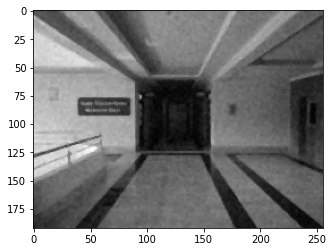

In [11]:
# fig=plt.figure(figsize=(15,15))
# ax=fig.add_subplot(111)
plt.imshow(new_img,'gray')

In [12]:
print("PSNR(My method): ",metrics.peak_signal_noise_ratio(org,new_img))
print("PSNR(Using CV function): ",metrics.peak_signal_noise_ratio(org,new_img1))
cv2.imwrite('New Noisy Image.jpg', new_img)

PSNR(My method):  31.055864214078976
PSNR(Using CV function):  31.056002840527164


True